#                                        Credit Risk Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Data
We retrieve the csv file to load data in Pandas

In [ ]:
Loan_data = pd.read_csv(r'C:\Users\Samarth\Desktop\Projects\Loan_new\bankloans.csv')
Loan_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## Data Summary

We check the size of data, understand the type of columns and check for null values and get the mathematical summary of data


In [ ]:
print('total entries = %d\n'%Loan_data.shape[0])
print('total features = %d\n'%Loan_data.shape[1])
Loan_data.info()


total entries = 1000

total features = 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
Loan_data[['Saving accounts','Checking account']].isnull().sum()*100/Loan_data.shape[0]

Saving accounts     18.3
Checking account    39.4
dtype: float64

In [ ]:
for col in Loan_data:
     print("%s : %d"%(col, Loan_data[col].unique().size))
Loan_data.describe()

Unnamed: 0 : 1000
Age : 53
Sex : 2
Job : 4
Housing : 3
Saving accounts : 5
Checking account : 4
Credit amount : 921
Duration : 33
Purpose : 8
Risk : 2


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Data Insights
39.4 % of data in Checking account is missing <br>
18.3 % of data in Saving accounts is missing. <br>
We will have to drop the column=Checking accounts for Model Building <br>
We will further fill the values for Savings account <br>
We see that 'Sex', 'Job','Agegroup', 'Housing', 'Saving_accounts', 'Purpose' are categorical columns <br>
Unamed: 0 columns has no required value

## Processing the Data as per requirement

In [ ]:
#Remove unnecesarry columns
Loan_data.drop(columns=['Unnamed: 0'],inplace=True)
Loan_data.drop(columns=['Checking account'], inplace=True)

#Rename columns for convinience
Loan_data.rename(columns={'Saving accounts' : 'Saving_accounts', 'Credit amount' : 'Credit_amount'}, inplace=True)

In [ ]:
#converting Risk to numeric for convinience
def Values_conv(x):
    if x=='good':
        y=1
    else:
        y=0
    return(y)
Loan_data['Risk']=Loan_data['Risk'].apply(lambda x: Values_conv(x))


C:\Users\Samarth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

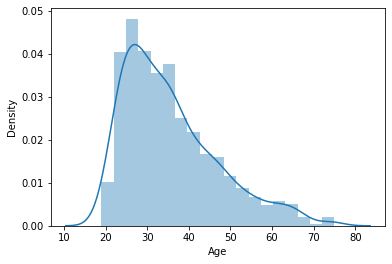

In [ ]:
sns.distplot(Loan_data['Age'])

In [ ]:
## Creating age group columns for Analysis Purpose
def age_grouping(x):
    if x<25:
        z='Young'
    elif x<35:
        z='Young Adults'
    elif x < 50:
        z='Senior'
    else:
        z='Elder'
    return(z)
Loan_data['Agegroup'] = Loan_data['Age'].apply(lambda x: age_grouping(x))

In [ ]:
## Converting Categorical columns to categorical type

Loan_data[['Sex', 'Job','Agegroup', 'Housing', 'Saving_accounts', 'Purpose']]=Loan_data[['Sex', 'Job', 'Agegroup','Housing', 'Saving_accounts','Purpose' ]].apply(lambda x: x.astype('category'))

In [ ]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1000 non-null   int64   
 1   Sex              1000 non-null   category
 2   Job              1000 non-null   category
 3   Housing          1000 non-null   category
 4   Saving_accounts  817 non-null    category
 5   Credit_amount    1000 non-null   int64   
 6   Duration         1000 non-null   int64   
 7   Purpose          1000 non-null   category
 8   Risk             1000 non-null   int64   
 9   Agegroup         1000 non-null   category
dtypes: category(6), int64(4)
memory usage: 38.4 KB


### Understanding  the relations in Data

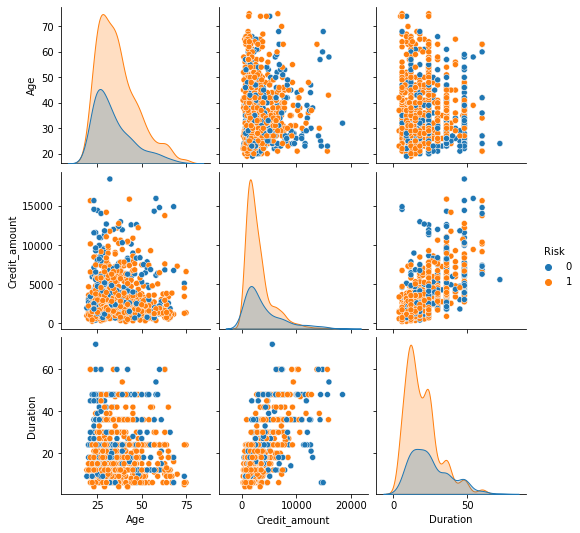

In [ ]:
#Loan_data['Housing'].value_counts()
sns.pairplot(Loan_data, hue='Risk')

<AxesSubplot:>

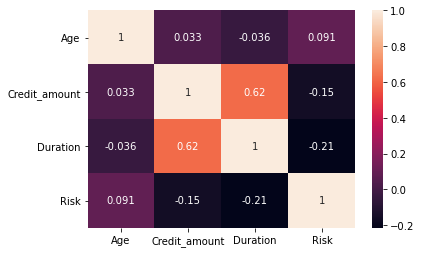

In [ ]:
sns.heatmap(Loan_data.corr(),annot=True)

There is a high relation between credit amoount and duration  <br>
In scatterplot we notice that for high credit amount we have high duration for goodloans<br>
Risk is highly relaated to Duration and credit amount <br>


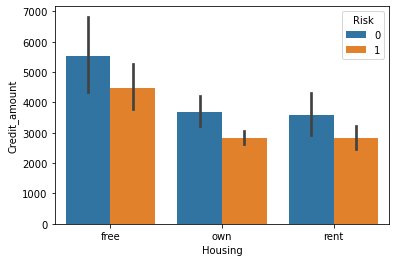

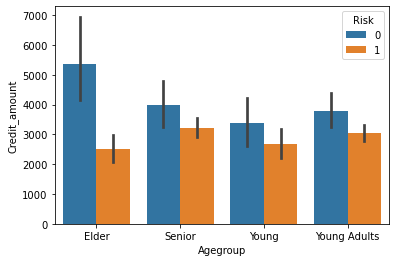

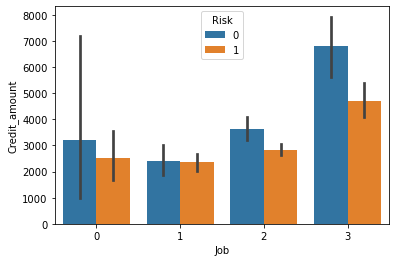

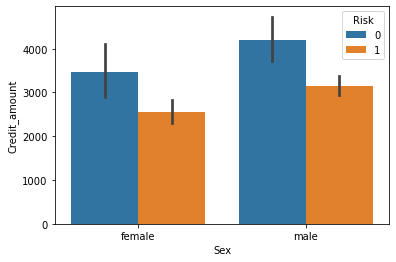

In [ ]:
for i in ['Housing', 'Agegroup', 'Job', 'Sex', ]:
    graph = sns.barplot(x=i,y='Credit_amount',hue='Risk', data=Loan_data)
    plt.show()

In the above graphs we can see the credit amount confidance for each category

Text(0.5, 1.0, 'No of items in Percentage')

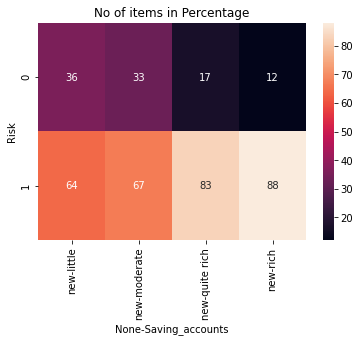

In [ ]:
# Heatmap based on Saving_account category
Loan_data['new']=1
table = pd.pivot_table(Loan_data,index=['Risk'],columns=['Saving_accounts'],values=['new'],aggfunc=np.sum)
table = round(table*100/table.sum())
sns.heatmap(table, annot=True).set_title("No of items in Percentage")

Understanding Missing Data

In [ ]:
print("Non Missing data stats")
print(Loan_data.dropna().describe())
print('\n')
print("Missing data stats")
print(Loan_data.loc[Loan_data['Saving_accounts'].isnull()].describe())
old_data=Loan_data # creating a copy final data frame

Non Missing data stats
              Age  Credit_amount   Duration        Risk    new
count  817.000000     817.000000  817.00000  817.000000  817.0
mean    35.127295    3128.990208   20.49694    0.671971    1.0
std     11.348251    2731.688353   11.84149    0.469783    0.0
min     19.000000     250.000000    4.00000    0.000000    1.0
25%     26.000000    1355.000000   12.00000    0.000000    1.0
50%     32.000000    2241.000000   18.00000    1.000000    1.0
75%     41.000000    3850.000000   24.00000    1.000000    1.0
max     75.000000   18424.000000   72.00000    1.000000    1.0


Missing data stats
              Age  Credit_amount    Duration        Risk    new
count  183.000000     183.000000  183.000000  183.000000  183.0
mean    37.415301    3906.409836   22.715847    0.825137    1.0
std     11.339525    3127.705890   12.863020    0.380892    0.0
min     20.000000     368.000000    4.000000    0.000000    1.0
25%     29.000000    1434.000000   12.000000    1.000000    1.0
50%  

In [ ]:
###Replacing null values with random sampling
##x = Loan_data['Saving_accounts'].dropna().sample(Loan_data['Saving_accounts'].isnull().sum()).values
##Loan_data['Saving_accounts'][Loan_data['Saving_accounts'].isnull()]=x
##Loan_data.isnull().sum()


## Data Pre-Processing

Preprocessing the data
We will use the following steps on input sets before building a model
1) Remove unqanted columns
2) Split the data in Train test parts
3) Encode categorical columns using OneHot Encoder
4) Handling Outliers
5) handling Missing Values
5) Scale the columns

In [ ]:
#Just keeping the wanted columns
Loan_data = Loan_data[['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Credit_amount',
       'Duration', 'Purpose', 'Risk']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer

x_train, x_test, y_train, y_test = train_test_split(Loan_data.iloc[:, :-1],Loan_data.iloc[:,-1], test_size=0.1, random_state=2 )


In [ ]:
# Encoding Saving_accounts Columns

scale_mapper = {"little":1, "quite rich":4, "moderate":2, 'rich':3}
x_train['Saving_accounts']=x_train['Saving_accounts'].replace(scale_mapper)
x_test['Saving_accounts']=x_test['Saving_accounts'].replace(scale_mapper)

In [ ]:
# Encoding other columns using OneHotEncoder
ohe=OneHotEncoder(drop='first', sparse=False)
x_train_new = ohe.fit_transform(x_train[['Sex','Housing','Purpose']])
x_test_new = ohe.transform(x_test[['Sex','Housing','Purpose']])

x_train_new = np.hstack((x_train[['Age', 'Job', 'Saving_accounts', 'Credit_amount', 'Duration']].values,x_train_new))
x_test_new = np.hstack((x_test[['Age', 'Job', 'Saving_accounts', 'Credit_amount', 'Duration']].values,x_test_new))

x_train_new = pd.DataFrame(x_train_new)
x_test_new = pd.DataFrame(x_test_new)

In [ ]:
# Capping Outliers
def outliers_handling(x):
    x = x.clip(lower = x.quantile(0.05), upper = x.quantile(0.95))
    return x
x_train_new = x_train_new.apply(lambda x: outliers_handling(x))
x_test_new = x_test_new.apply(lambda x: outliers_handling(x))

In [ ]:
# Handling Missing Values
knn=KNNImputer()
x_train_new = knn.fit_transform(x_train_new)
x_test_new = knn.transform(x_test_new)
x_train_new = pd.DataFrame(x_train_new)
x_test_new = pd.DataFrame(x_test_new)

In [ ]:
# Scaling using Min Max Scalar as we have Handled the outliers
std=MinMaxScaler()
x_train_new = std.fit_transform(x_train_new.to_numpy())
x_test_new = std.fit_transform(x_test_new.to_numpy())

print(x_train_new.shape)
print(x_test_new.shape)



(900, 15)
(100, 15)


## Metric Selection

Since our objective is to minimize company loss, predicting the risk of client default.
a good recall rate is desirable because we want to identify the maximum amount of clients that are indeed prone to stop paying their debts
Thus, we are pursuing a small number of False Negatives

## Model Selection

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

knc = KNeighborsClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
gnb = GaussianNB()

clfs = {'K-Nearest-Neighb' : knc,  'Logistic Regression': lrc,
        'Random Forest Classifier': rfc, 'Gaus Naive Bayes' :gnb}

def train_classifier(clf,x_train_new,y_train,x_test_new,y_test):
    clf.fit(x_train_new,y_train)
    y_pred = clf.predict(x_test_new)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)

    return accuracy,recall

In [ ]:
x_test_new.shape

(100, 15)

In [ ]:
accuracy_scores = []
precision_scores = []
Name = []
for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train_new,y_train,x_test_new,y_test)


    Name.append(name)
    accuracy_scores.append(current_accuracy*100)
    precision_scores.append(current_precision*100)
result = pd.DataFrame([Name,accuracy_scores,precision_scores ]).transpose()
result.rename(columns={0:'Algorithm' , 1:'Accuracy', 2:'Recall'}).sort_values(by='Recall', ascending=False)

,Algorithm,Accuracy,Recall
2,Logistic Regression,69.0,91.176471
3,Random Forest Classifier,69.0,86.764706
0,K-Nearest-Neighb,60.0,76.470588
4,Gaus Naive Bayes,62.0,75.0


## Individual Model Study

### K nearest Neigbour

In [ ]:
#for i in range(1,2):
#print('for i = %d'%i)
clf=KNeighborsClassifier(n_neighbors=16, weights='distance')
clf.fit(x_train_new,y_train)
y_pred = clf.predict(x_test_new)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("accuracy :%f\n recall : %f\n"%(accuracy, recall))


accuracy :0.660000
 recall : 0.911765



### Random Forest Classifier

In [ ]:
# Number of trees in random forest
n_estimators = [80,100,120,140.160,180]

# Maximum number of levels in tree
max_depth = [8,10,12,16,18,22]

# Number of samples
max_samples = [0.75,1.0]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'max_samples':max_samples}

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rfc,
                       param_grid = param_grid,
                       cv = 5, scoring = 'recall')
#rf_grid.fit(x_train_new,y_train)
#rf_grid.best_params_
#'max_depth': 8, 'max_samples': 0.75, 'n_estimators': 80

In [ ]:
rfc = RandomForestClassifier(max_depth=8, max_samples=0.75,n_estimators=80)
rfc.fit(x_train_new,y_train)
y_pred=rfc.predict(x_test_new)
recall = recall_score(y_test, y_pred)*100
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy : %d, recall : %d"%(accuracy, recall))

Accuracy : 70, recall : 92


max_depth= 18, max_samples=0.75, n_estimators=80

# Final results

In [ ]:
knc = KNeighborsClassifier(n_neighbors=16, weights='distance')
rfc = RandomForestClassifier(max_depth=8, max_samples=0.75,n_estimators=80)
mnb = MultinomialNB()

clfs = {'K-Nearest-Neighb' : knc, 'Mult Naive Bayes': mnb, 'Random Forest Classifier': rfc}

def train_classifier(clf,x_train_new,y_train,x_test_new,y_test):
    clf.fit(x_train_new,y_train)
    y_pred = clf.predict(x_test_new)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)

    return accuracy,recall
accuracy_scores = []
precision_scores = []
Name = []
for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train_new,y_train,x_test_new,y_test)


    Name.append(name)
    accuracy_scores.append(current_accuracy*100)
    precision_scores.append(current_precision*100)
result = pd.DataFrame([Name,accuracy_scores,precision_scores ]).transpose()
result.rename(columns={0:'Algorithm' , 1:'Accuracy', 2:'Recall'}).sort_values(by='Recall', ascending=False)

,Algorithm,Accuracy,Recall
1,Mult Naive Bayes,69.0,100.0
2,Random Forest Classifier,70.0,92.647059
0,K-Nearest-Neighb,66.0,91.176471
